In [1]:
# lets import the libraries and data set

import pandas as pd
from matplotlib import pyplot as plt

# Import data set

df = pd.read_excel(r'C:\Users\Laxman\OneDrive\Desktop\Data Files_1\Cars.xlsx')

df.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact


All ALMOST NORMALLY distributed data may still have few outliers. Thus, we not need to find a way to find these outliers by using Boxplot

Lets see the Boxplot method to find the outliers: The skewness of cty column is not ZERO thus it may have some outliers


In [2]:
import matplotlib.pyplot as pli

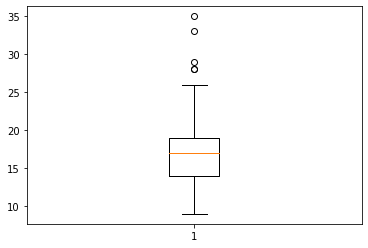

In [3]:
# Lets plot the data of cty column using boxplot command from matplotlib

plt.boxplot(df['cty'])

plt.show()

The above box plot have following outcome: 

1) First Quatile Value (Q1) - 25%  of your data values
2) 2nd Quatile Value (Q2) - 50% of your data values. It is also know as the median value of data
3) 3rd Quatile value (Q3) - 75% of your data values.
4) Upper Whisker - Any data value above this will be classified as extreme HIGH value. This is calculated using a formula - Q3 + 1.5* IQR
5) Lower Whisker - Any data value below this will be classified as extreme LOW value. This is calculated as Q1 - 1.5*IQR
6) IQR - Interquatile range - Which represent the variance in the data. 

PLEASE refere the excel file for detail notes.

In some data, where I have large set of outliers, boxplot may not give a good result. Thus, we must also know, how to find the outliers in data manually.

Use the following steps:

In [4]:
# STEP 1: Find the Q1, Q2 and Q3 using a library numpy

import numpy as np

Q1 = np.quantile(df['cty'], 0.25)
Q2 = np.quantile(df['cty'], 0.50)
Q3 = np.quantile(df['cty'], 0.75)

# STEP 2: Find IQR 

IQR = Q3 - Q1

# STEP 3: Find the upper whisker

UW = Q3 + 1.5*IQR

# STEP 4: Find the lower whisker

LW = Q1 - 1.5*IQR

# Lets print output

print("Q1 value is: ", Q1)
print("Q2 value is: ", Q2)
print("Q3 value is: ", Q3)
print("IQR value is: ", IQR)
print("UW value is: ", UW)
print("LW value is: ", LW)

Q1 value is:  14.0
Q2 value is:  17.0
Q3 value is:  19.0
IQR value is:  5.0
UW value is:  26.5
LW value is:  6.5


In [5]:
# Lets create a new column in the data set to label values as outlier or not

df['Outlier'] = np.where((df['cty'] > 26.5) | (df['cty'] < 6.5), "Yes", "No")

df.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,Outlier
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact,No
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact,No
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact,No
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact,No
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact,No


In [6]:
# PS1: Filter the data frame df where outlier column contain value "Yes"

# Create Fliter contion

FC = df['Outlier'] == "Yes"

# The output of FC will be boolean value in case the row fullfill the condition or not
FC

# We now use [] - When you pass the filter condition in [] by default the outcome will be the rows which fullfill the 
# condition

df[FC]

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,Outlier
99,honda,civic,1.6,1999,4,manual(m5),28,33,r,subcompact,Yes
196,toyota,corolla,1.8,2008,4,manual(m5),28,37,r,compact,Yes
212,volkswagen,jetta,1.9,1999,4,manual(m5),33,44,d,compact,Yes
221,volkswagen,new beetle,1.9,1999,4,manual(m5),35,44,d,subcompact,Yes
222,volkswagen,new beetle,1.9,1999,4,auto(l4),29,41,d,subcompact,Yes


In [7]:
# PS2: Find the number of cars with displacement of greater than 2.2

FC2 = df['displ'] > 2.2

df[FC2].shape

(185, 11)

In [8]:
#PS: Find the average displacement for cars where displ is greater than 2.2

df[df['displ']>2.2]['displ'].mean()

3.8827027027026992

In [9]:
# PS3 in a single line of code

df[(df['displ']>2.2) & (df['cty']>19)].shape

(19, 11)